In [13]:
%matplotlib inline

In [27]:
import os

import numpy as np
import matplotlib.pyplot as plt

from skimage import io
import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color

from skimage import img_as_float



def image_show(image, nrows=1, ncols=1, cmap='gray', **kwargs):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 16))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax

In [3]:
IMAGES_DIRECTORY = 'images'

In [6]:
image_files = os.listdir(IMAGES_DIRECTORY)

In [14]:

filename = os.path.join(IMAGES_DIRECTORY, image_files[0])
photo = io.imread(filename)

(<Figure size 1152x1152 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x130a96f98>)

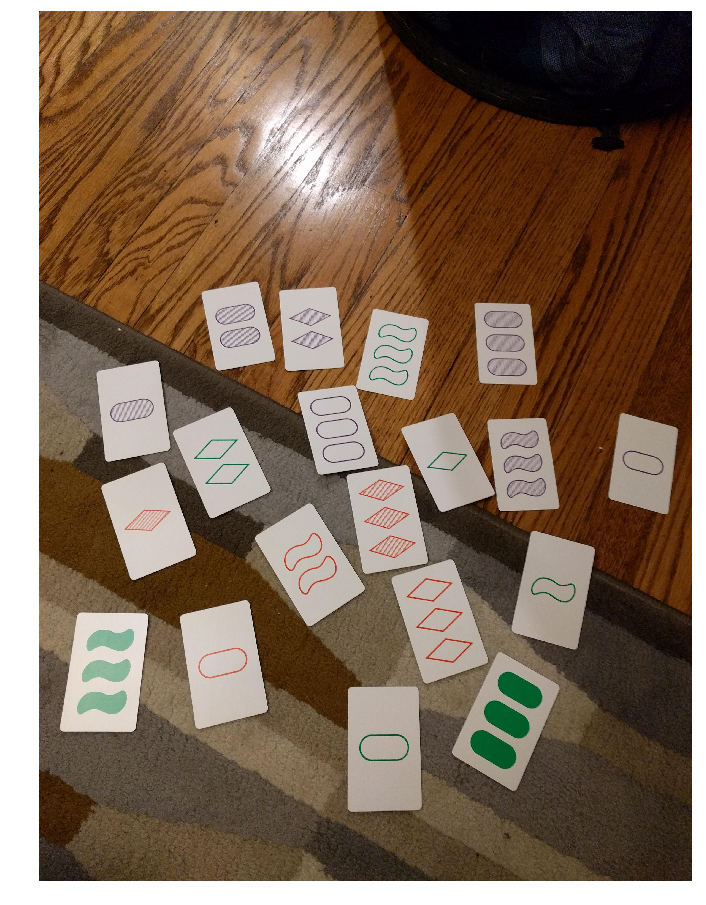

In [15]:
image_show(photo)

(<Figure size 1152x1152 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x13728f2e8>)

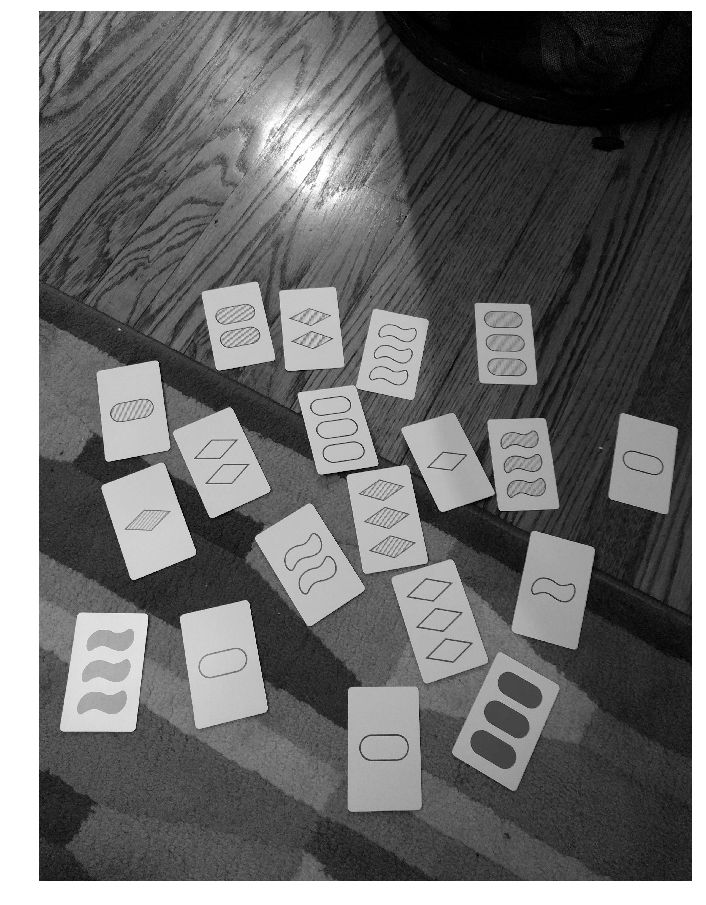

In [35]:
bw_photo = color.rgb2grey(photo)
image_show(bw_photo)

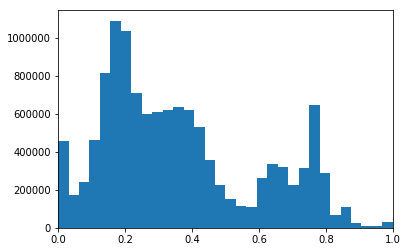

In [40]:
fig, ax = plt.subplots(1, 1)
ax.hist(bw_photo.ravel(), bins=32)
ax.set_xlim(0, 1);

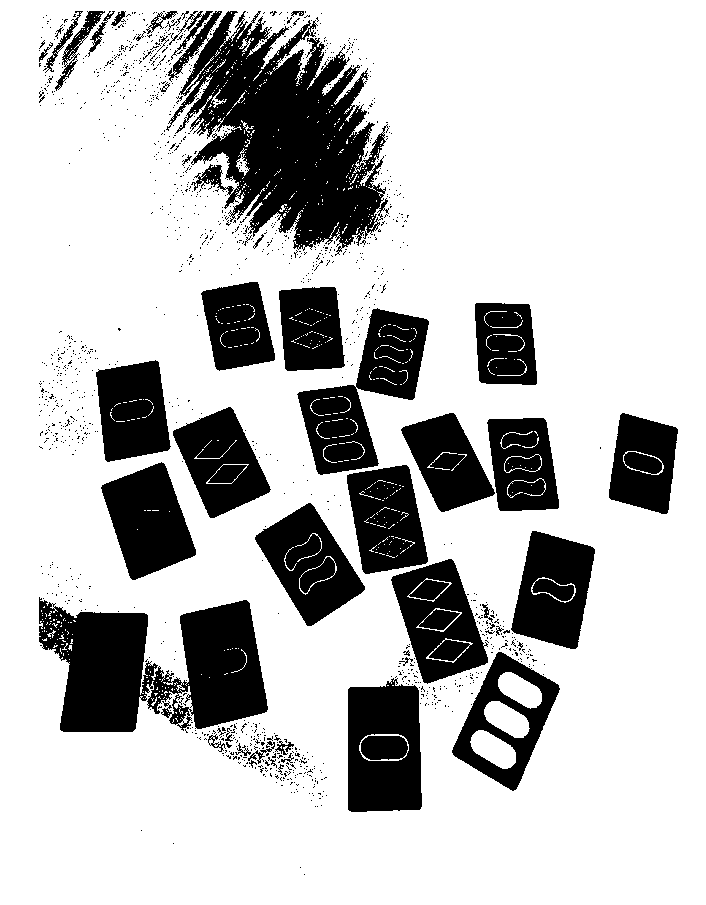

In [44]:
photo_otsu_thresholded = filters.threshold_otsu(image=bw_photo)
image_show(bw_photo < photo_otsu_thresholded);

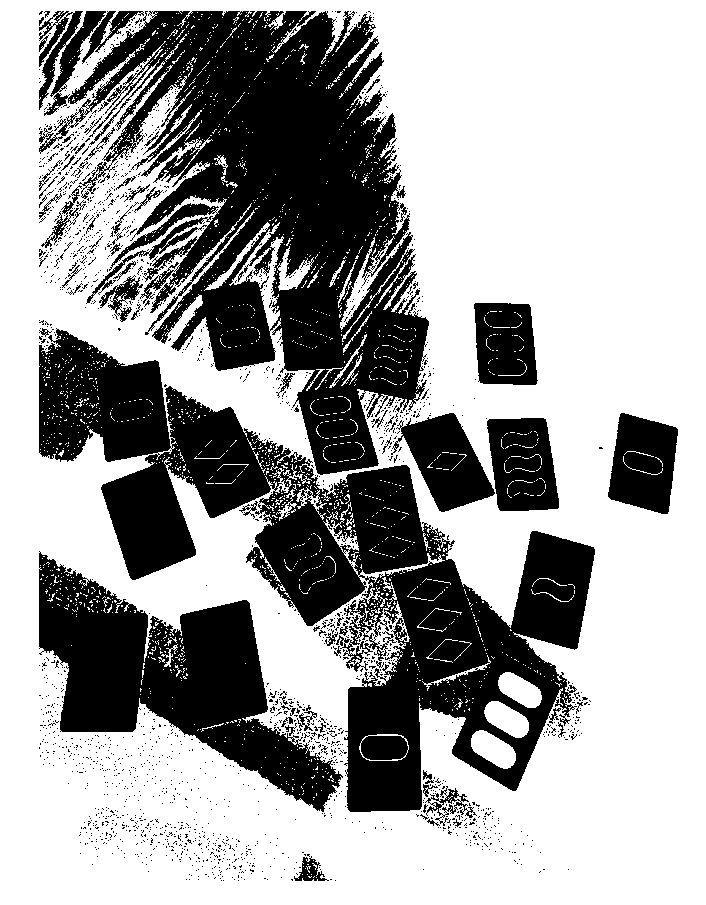

In [45]:
photo_li_thresholded = filters.threshold_li(image=bw_photo)
image_show(bw_photo < photo_li_thresholded);

(<Figure size 1152x1152 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12360bac8>)

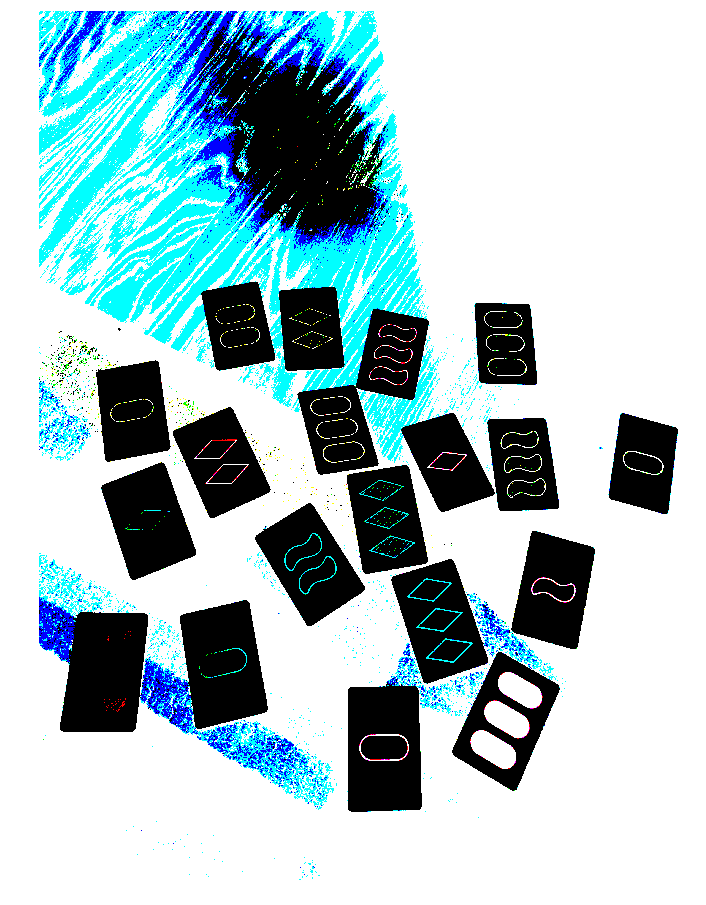

In [77]:
thresholded_image = np.empty(photo.shape)
for channel_ind in range(3):
    single_channel_photo = photo[:,:,channel_ind]
    channel_threshold = filters.threshold_otsu(image=single_channel_photo)
    thresholded_image[:, :, channel_ind] = single_channel_photo < channel_threshold 
image_show(thresholded_image)
    

In [70]:
photo.shape

(4032, 3024, 3)